This project is about **Jobs** and **Salaries** in Data Science. Let's take a look at the csv file which contains some useful information:

*Source: https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data?resource=download*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("jobs_in_data.csv")

In [2]:
df.dtypes

work_year              int64
job_title             object
job_category          object
salary_currency       object
salary                 int64
salary_in_usd          int64
employee_residence    object
experience_level      object
employment_type       object
work_setting          object
company_location      object
company_size          object
dtype: object

Cool. According to the source, we have these columns and what is it about:

**work_year**: The year in which the data was recorded. This field indicates the temporal context of the data, important for understanding salary trends over time.

**job_title**: The specific title of the job role, like 'Data Scientist', 'Data Engineer', or 'Data Analyst'. This column is crucial for understanding the salary distribution across various specialized roles within the data field.

**job_category**: A classification of the job role into broader categories for easier analysis. This might include areas like 'Data Analysis', 'Machine Learning', 'Data Engineering', etc.

**salary_currency**: The currency in which the salary is paid, such as USD, EUR, etc. This is important for currency conversion and understanding the actual value of the salary in a global context.

**salary**: The annual gross salary of the role in the local currency. This raw salary figure is key for direct regional salary comparisons.

**salary_in_usd**: The annual gross salary converted to United States Dollars (USD). This uniform currency conversion aids in global salary comparisons and analyses.

**employee_residence**: The country of residence of the employee. This data point can be used to explore geographical salary differences and cost-of-living variations.

**experience_level**: Classifies the professional experience level of the employee. Common categories might include 'Entry-level', 'Mid-level', 'Senior', and 'Executive', providing insight into how experience influences salary in data-related roles.

**employment_type**: Specifies the type of employment, such as 'Full-time', 'Part-time', 'Contract', etc. This helps in analyzing how different employment arrangements affect salary structures.

**work_setting**: The work setting or environment, like 'Remote', 'In-person', or 'Hybrid'. This column reflects the impact of work settings on salary levels in the data industry.

**company_location**: The country where the company is located. It helps in analyzing how the location of the company affects salary structures.

**company_size**: The size of the employer company, often categorized into small (S), medium (M), and large (L) sizes. This allows for analysis of how company size influences salary.

Let's see what the rows look like and what we can do with the given data.

In [3]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [9]:
#talvez pro futuro: conseguir prever o salario de alguem que está entrando agora (ou entao dadas certas informaçoes, adivinhar o salario dele)
# usando conjunto de treinamento e teste etc.

Great. First of all, we'll separate the employees into groups (by their job titles) and get the average salary of each group.

In [14]:
df.value_counts('job_title')

job_title
Data Engineer                           2195
Data Scientist                          1989
Data Analyst                            1388
Machine Learning Engineer                991
Applied Scientist                        272
                                        ... 
Manager Data Management                    1
Cloud Data Architect                       1
Deep Learning Researcher                   1
Machine Learning Operations Engineer       1
Staff Machine Learning Engineer            1
Name: count, Length: 125, dtype: int64

In [17]:
title_mean_salaries = df.groupby('job_title')['salary_in_usd'].mean().reset_index()
title_mean_salaries['salary_in_usd'] = title_mean_salaries['salary_in_usd'].round(2)

title_mean_salaries = title_mean_salaries.sort_values('salary_in_usd')
title_mean_salaries = title_mean_salaries.reset_index(drop=True)[['job_title', 'salary_in_usd']] # dropping the index column, we won't need it

title_mean_salaries

,job_title,salary_in_usd
0,Compliance Data Analyst,45000.00
1,Insight Analyst,47673.88
2,Machine Learning Specialist,55000.00
3,Data Operations Specialist,55355.00
4,Data Management Analyst,56000.00
...,...,...
120,AWS Data Architect,258000.00
121,Head of Machine Learning,259000.00
122,Managing Director Data Science,300000.00
123,Data Science Tech Lead,375000.00


Since we have 125 jobs titles, it is better to plot the head and tail of this dataset, otherwise the graph will be harmful to our eyes.

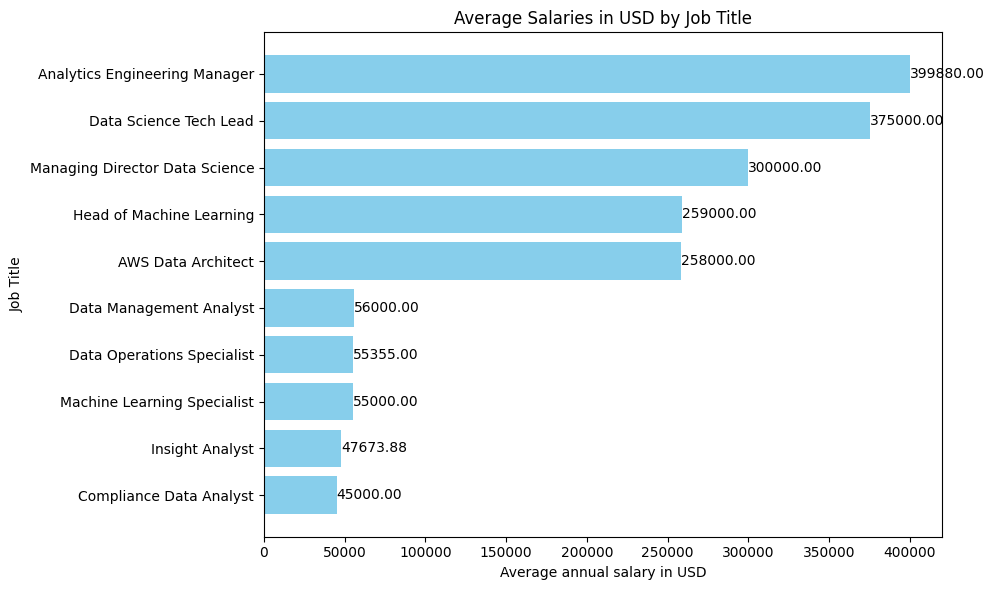

In [18]:
head = title_mean_salaries.head()
tail = title_mean_salaries.tail()

new_mean_salaries = pd.concat([head, tail])

title_jobs = new_mean_salaries['job_title']
title_salaries = new_mean_salaries['salary_in_usd']

plt.figure(figsize=(10, 6))
plt.barh(title_jobs, title_salaries, color='skyblue')

plt.xlabel("Average annual salary in USD")
plt.ylabel("Job Title")
plt.title("Average Salaries in USD by Job Title")

for index, value in enumerate(title_salaries):
    plt.text(value, index, f'{value:.2f}', ha='left', va='center', color='black') # printing the salary next to the bar

plt.tight_layout()
plt.show()

Wow! As you can see, roles like managers and tech leads earn the highest salaries, and that's visible due to the fact that they command teams of qualified professionals in key domains within data science, including analytics engineering, machine learning and data architecture.

This time, we'll consider the job category and not its title. It is a way to detect the most valuable area among all careers in Data Science.

In [19]:
df.value_counts('job_category')

job_category
Data Science and Research         3014
Data Engineering                  2260
Data Analysis                     1457
Machine Learning and AI           1428
Leadership and Management          503
BI and Visualization               313
Data Architecture and Modeling     259
Data Management and Strategy        61
Data Quality and Operations         55
Cloud and Database                   5
Name: count, dtype: int64

There are only 10 categories, so it will be easier to plot the bar graph and see the average salary per category precisely.

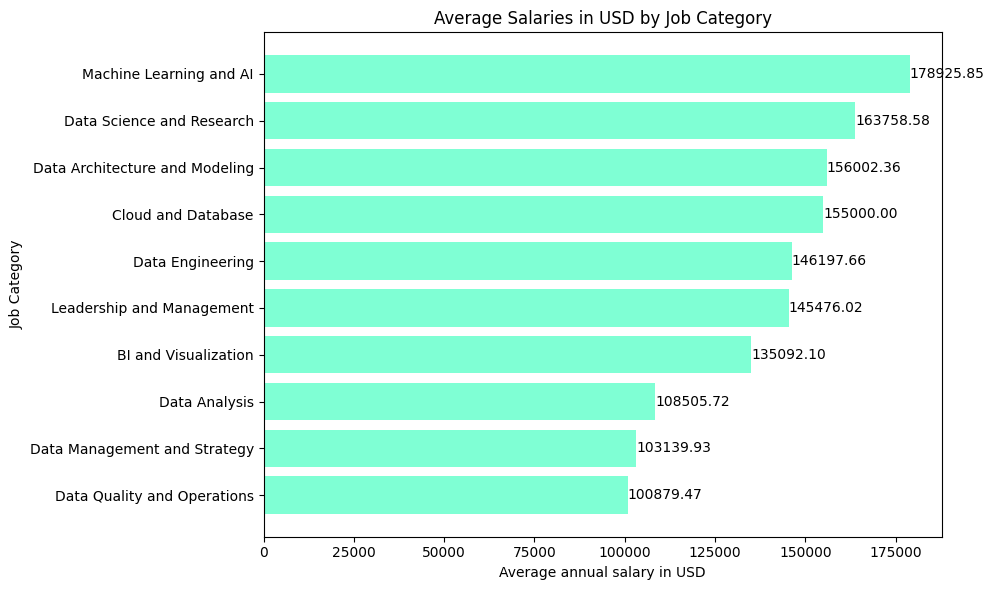

In [20]:
category_mean_salaries = df.groupby('job_category')['salary_in_usd'].mean().reset_index()
category_mean_salaries['salary_in_usd'] = category_mean_salaries['salary_in_usd'].round(2)

category_mean_salaries = category_mean_salaries.sort_values('salary_in_usd')
category_mean_salaries = category_mean_salaries.reset_index(drop=True)[['job_category', 'salary_in_usd']]

jobs = category_mean_salaries['job_category']
salaries = category_mean_salaries['salary_in_usd']

plt.figure(figsize=(10, 6))
plt.barh(jobs, salaries, color='aquamarine')

plt.xlabel("Average annual salary in USD")
plt.ylabel("Job Category")
plt.title("Average Salaries in USD by Job Category")

for index, value in enumerate(salaries):
    plt.text(value, index, f'{value:.2f}', ha='left', va='center', color='black')

plt.tight_layout()
plt.show()

The continuous rise of Machine Learning and AI and the "race" to build applications and softwares undoubtedly lead the big techs to invest in these products, such as Google Bard, Bing Chat, Chat GPT and more.

Furthermore, it is also important to mention the investment in new Data Science and Research resources. It improves the accuracy and efficiency of processes that use Machine Learning algorithms. [For example, the implementation of Data Science in Biomedicine is helping to accelerate patient diagnoses and create personalised medicine based on biomarkers.](https://www.cambridgespark.com/case-studies/the-role-of-data-science-in-research)



To be continued...